<table style="width:100%;font-size:11pt">
        <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%"><center>Asignatura</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Datos del alumno</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:10%"><center>Fecha</center>
            </td>
        </tr>
        <tr style="width:100%;font-size:11pt">
            <td rowspan="2" style="border: 1px #0098cd solid"><center><b>Técnicas Multivariantes y Machine Learning</b></center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left">Moreno Sánchez</td>
            <td rowspan="2" style="border: 1px #0098cd solid"><center>10-2-25</center>
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Miguel 
            </td>
        </tr>
            <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Actividad</center>
            </td>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:left">Actividad: Resolver un problema de clasificación
            </td>
        </tr>    
</table>

# 1) Describe tu conjunto de datos, aplica los métodos info, describe, head, tail y los que creas adecuados y obtén un análisis gráfico de todas las variables (predictoras y respuesta)

In [6]:
# Se empieza importando el conjunto de datos en un dataframe. Para ello se importa el módulo pandas
import pandas as pd

dataset = pd.read_excel('ingmaco04_act3_drugs.xlsx')

# Se muestran las primeras filas del conjunto de datos
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25355.0,drugY
1,47,M,LOW,HIGH,13093.0,drugC
2,47,M,LOW,HIGH,10114.0,drugC
3,28,F,NORMAL,HIGH,7798.0,drugX
4,61,F,LOW,HIGH,18043.0,drugY


In [8]:
# Se muestran las últimas filas del conjunto de datos
dataset.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11567.00,drugC
196,16,M,LOW,HIGH,12006.00,drugC
197,52,M,NORMAL,HIGH,9894.00,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX
199,40,F,LOW,NORMAL,11349.00,drugX


In [10]:
# Se describe el conjunto de datos de forma general usando el método 'info'. Se observa que el conjunto de datos consiste en 200 observaciones/pacientes con seis variables. Dos de estas
# variables son numéricas: la edad, que son números enteros, y el ratio de sodio-potasio en sangre. El resto de variables son cualitativas/categóricas.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [12]:
# Se realiza una descripción estadística del dataset empleando el método 'describe'. Dicha descripción solo se hace de las variables numéricas. Se observa que la media de edad es 44 con
# una desviación estándar de 16.5, mientras que la media del ratio Na-K es de 14901 con una desviación estándar de 8322.8.
print(dataset.describe())

              Age       Na_to_K
count  200.000000    200.000000
mean    44.315000  14901.706900
std     16.544315   8322.843139
min     15.000000      7.340000
25%     31.000000  10053.000000
50%     45.000000  13110.000000
75%     58.000000  19204.500000
max     74.000000  38247.000000


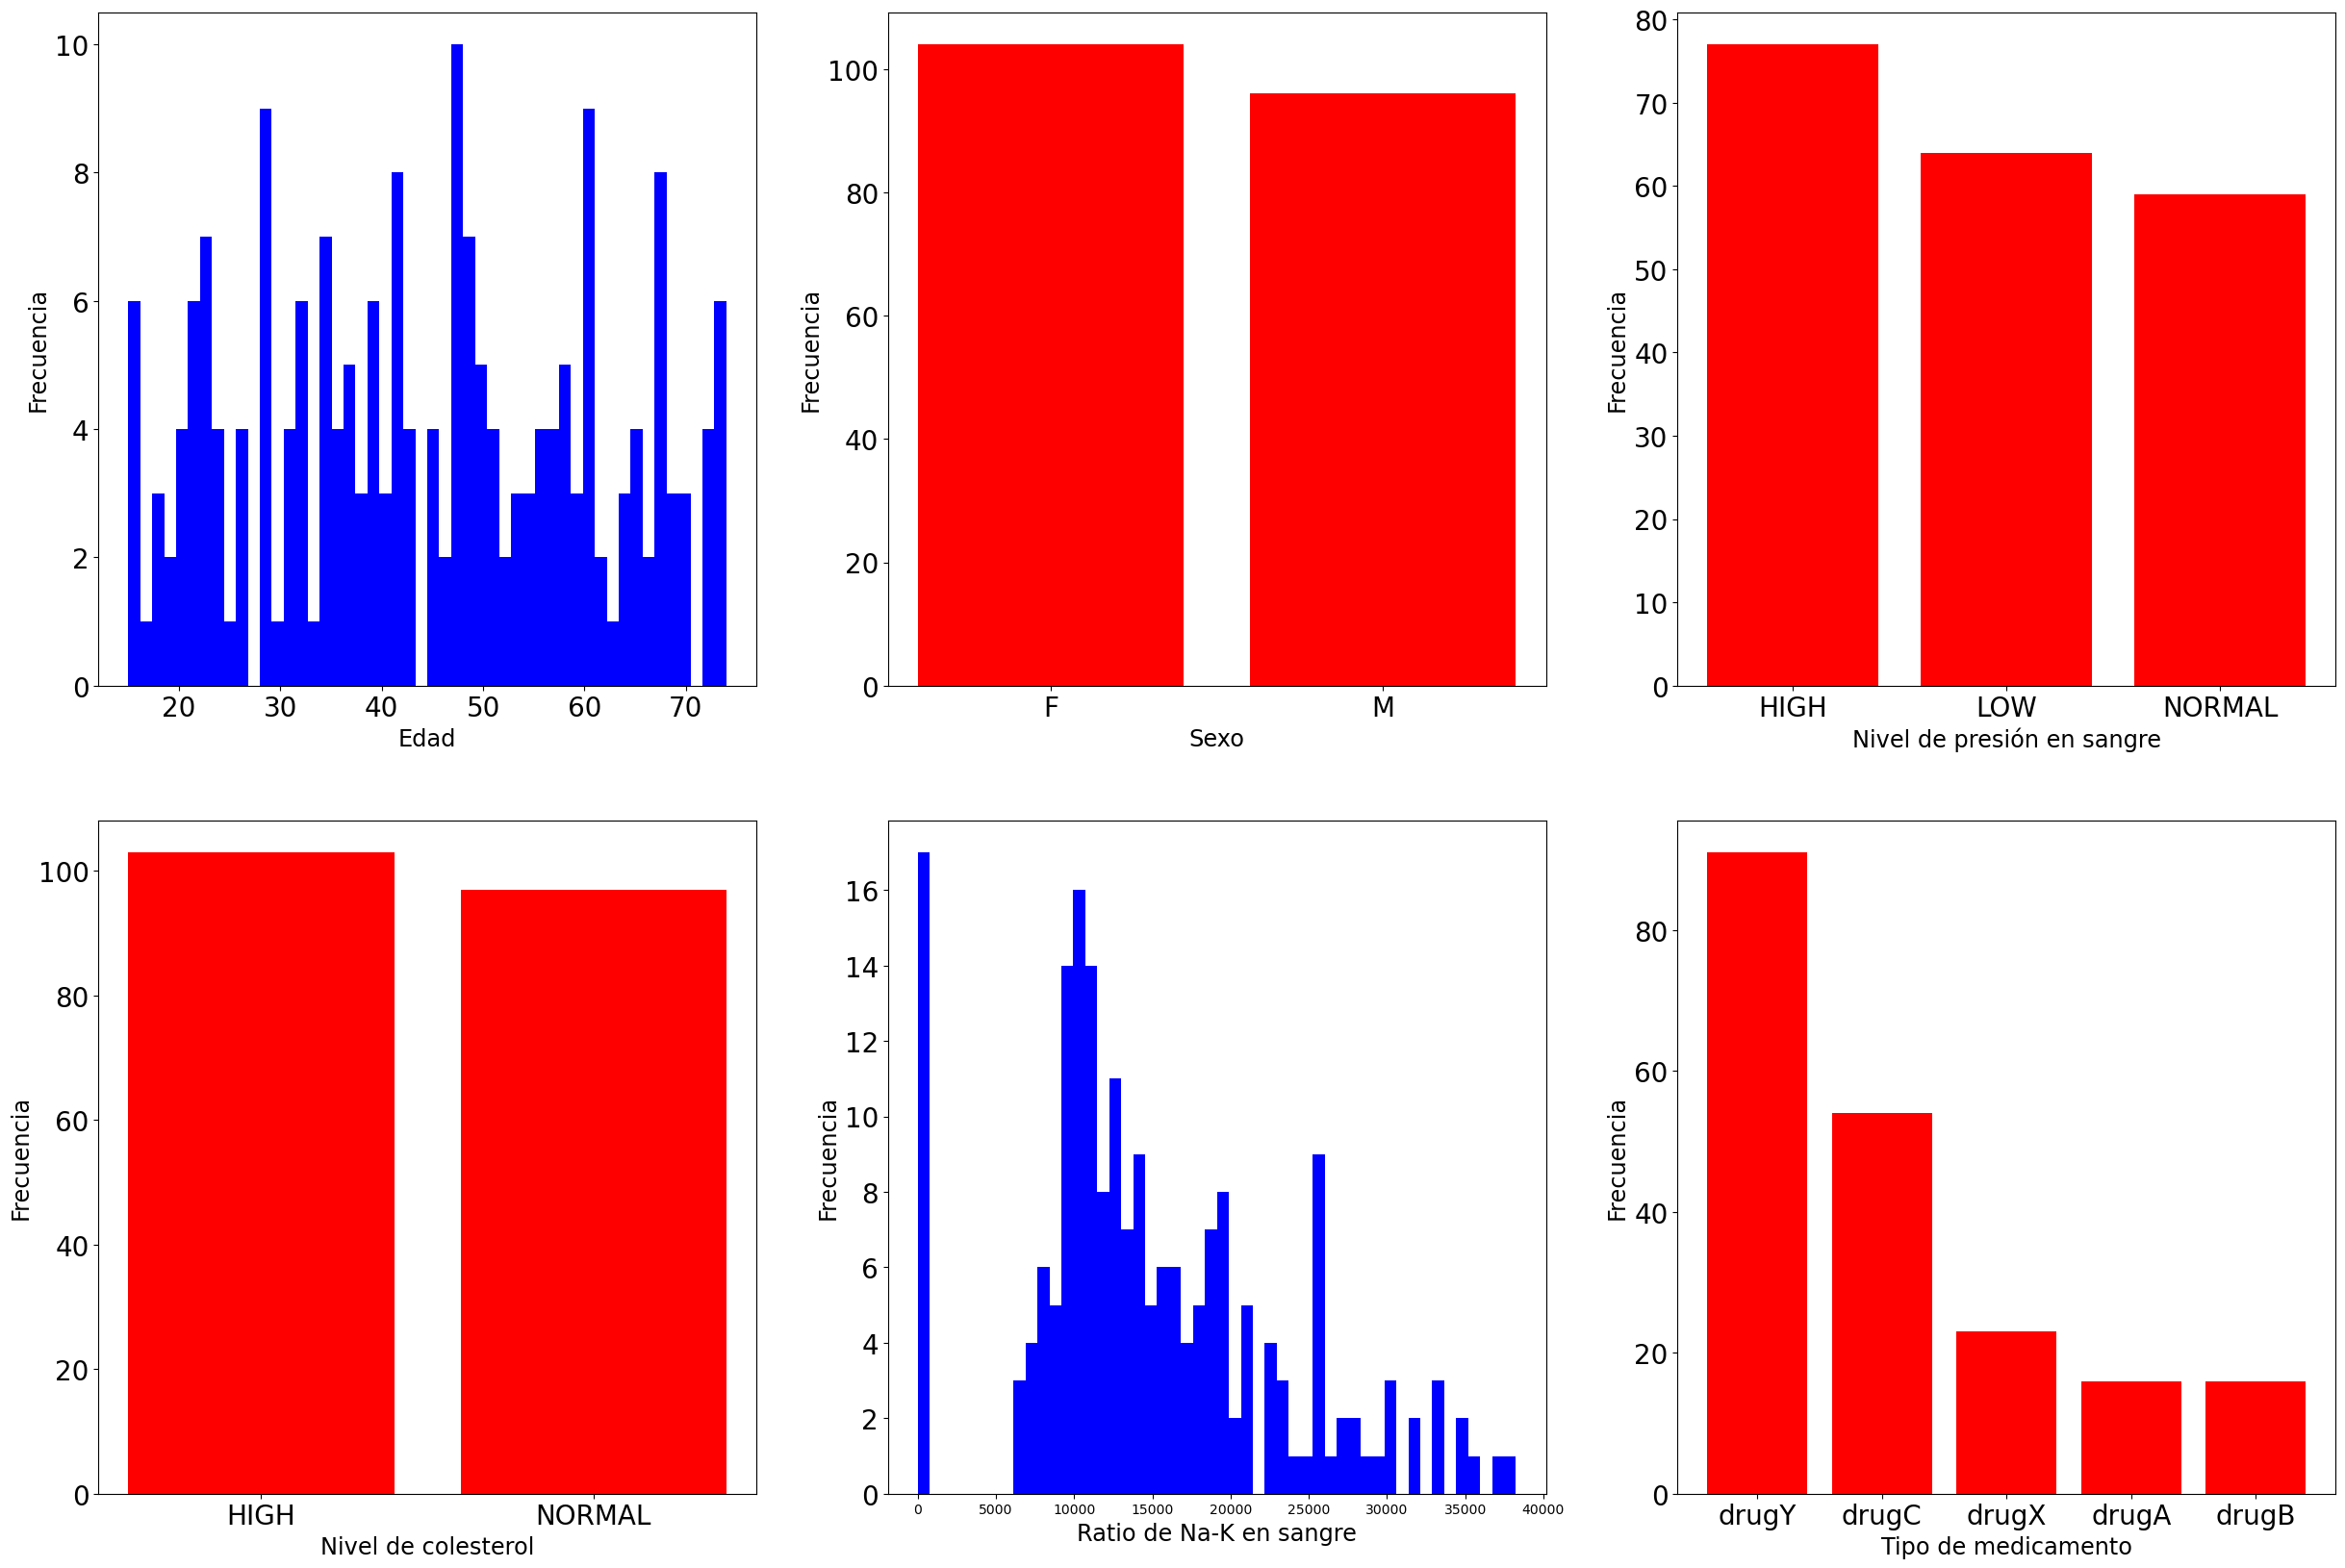

In [112]:
# A continuación, se realiza un análisis gráfico mediante histogramas de todas las variables. Para ello se emplea la librería pyplot.
# Los histogramas de las variables numéricas se han pintado de color azul, mientras que los histogramas de las variables categóricas se han pintado de color rojo.
import matplotlib.pyplot as plt

figura = plt.gcf()
figura.set_size_inches(30,20) # Tamaño figura

# Variable Age
plt.subplot(231)
plt.hist(dataset['Age'], bins=50, color='blue')
plt.xlabel('Edad', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Variable Sex
plt.subplot(232)
x_values = dataset['Sex'].unique()
y_values = dataset['Sex'].value_counts().tolist()
plt.bar(x_values,y_values,color='red')
plt.xlabel('Sexo', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Variable BP
plt.subplot(233)
x_values = dataset['BP'].unique()
y_values = dataset['BP'].value_counts().tolist()
plt.bar(x_values,y_values,color='red')
plt.xlabel('Nivel de presión en sangre', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Variable Cholesterol
plt.subplot(234)
x_values = dataset['Cholesterol'].unique()
y_values = dataset['Cholesterol'].value_counts().tolist()
plt.bar(x_values,y_values,color='red')
plt.xlabel('Nivel de colesterol', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Variable Na_to_K
plt.subplot(235)
plt.hist(dataset['Na_to_K'], bins=50, color='blue')
plt.xlabel('Ratio de Na-K en sangre', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

# Variable Drug
plt.subplot(236)
x_values = dataset['Drug'].unique()
y_values = dataset['Drug'].value_counts().tolist()
plt.bar(x_values,y_values,color='red')
plt.xlabel('Tipo de medicamento', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# 2) Divide el conjunto de datos para que el 75 % de las observaciones se usen en el entrenamiento y el resto para la validación de los distintos métodos de clasificación.

In [17]:
# Para dividir el conjunto de datos en un subconjunto de entrenamiento y en un subconjunto de test de forma aleatoria, se usa el módulo 'random' de 'numpy'.
import numpy as np

# Función para crear el conjunto de entrenamiento y el conjunto de validación
# 'dataset' es el dataframe y 'porcentaje_validacion' es la proporción en tanto por un 1 para el conjunto de validación.
def particiones(dataset, porcentaje_validacion):
    
    # 'int' se queda con la parte entera. Con len(dataset) se calcula la longitud de cada columna
    tamaño_validacion = int(round(len(dataset)*porcentaje_validacion,0))

    # Crea un array con los índices de 'dataset' dispuestos de forma aleatoria
    mezclar_indices = np.random.permutation(len(dataset))

    # Se queda con tantos índices del array anterior como datos debe haber en el conjunto de validación
    indices_validacion = mezclar_indices[:tamaño_validacion]

    # Los índices restantes son para los datos del dataset de entrenamiento
    indices_entrenamiento = mezclar_indices[tamaño_validacion:]

    # Se devuelven los dataset de entrenamiento y de test. 'iloc' saca filas
    return dataset.iloc[indices_entrenamiento], dataset.iloc[indices_validacion]

# Se llama a la función para crear el conjunto de entrenamiento (conj_entrenamiento) y el conjunto de validación (conj_validacion). Se pasa como porcentaje de validación 0.25.
conj_entrenamiento, conj_validacion = particiones(dataset, 0.25)

# Se comprueba que la partición es correcta calculando la cantidad de datos en cada conjunto
print('Cantidad teórica de datos en el conjunto de entrenamiento:', round(len(dataset)*0.75,0))
print('Cantidad de datos en el conjunto de entrenamiento creado:', len(conj_entrenamiento))
print('Cantidad teórica de datos en el conjunto de validación:', round(len(dataset)*0.25,0))
print('Cantidad de datos en el dataset de test creado:', len(conj_validacion))

Cantidad teórica de datos en el conjunto de entrenamiento: 150.0
Cantidad de datos en el conjunto de entrenamiento creado: 150
Cantidad teórica de datos en el conjunto de validación: 50.0
Cantidad de datos en el dataset de test creado: 50


# 3) Obtén un modelo de clasificación mediante un árbol de decisión utilizando los argumentos por defecto.

In [62]:
from sklearn.tree import DecisionTreeClassifier # Para crear árbol de decisión
from sklearn.tree import export_graphviz # Para exportar el árbol a archivo .dot y poder visualizarlo
from sklearn.preprocessing import OneHotEncoder # Para crear variable indicadora
from sklearn.compose import ColumnTransformer

# Tres de las variables predictoras son categóricas. Por ello deben tratarse introduciendo variables indicadoras, lo cual se consigue empleando la 
# clase OneHotEncoder de la librería 'sklearn.preprocessing'.

# Observaciones de las variables predictoras del conjunto de entrenamiento
X = conj_entrenamiento.drop('Drug', axis=1)

# Observaciones de las variables predictoras del conjunto de test
X_test = conj_validacion.drop('Drug', axis=1)

# Nombre de las variables predictoras categóricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.to_list()

# Nombre de las variables predictoras numéricas
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Se aplica el one-hot-encoding sobre las variables categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
                )

# Observaciones de las variables predictoras del conjunto de entrenamiento con los indicadores de las variables categóricas
X_entrenamiento_prepared = preprocessor.fit_transform(X)

# Observaciones de las variables predictoras del conjunto de test con los indicadores de las variables categóricas
X_test_prepared = preprocessor.fit_transform(X_test)

# Observaciones de la variable respuesta del conjunto de entrenamiento
y_entrenamiento = conj_entrenamiento['Drug']

# Observaciones de la variable respuesta del conjunto de validación
y_test = conj_validacion['Drug']

In [22]:
# El resultado devuelto por ColumnTransformer es un array de NumPy, por lo que se pierden los nombres de las columnas del dataframe.
# A continuación, convertimos el output de ColumnTransformer en un dataframe de nuevo, añadiendo los nuevos nombres de las columnas por la inclusión
# de las variables indicadoras.

# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, encoded_cat])

# Conversión a dataframe
X_entrenamiento_prepared = pd.DataFrame(X_entrenamiento_prepared, columns=labels)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=labels)

X_entrenamiento_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 150 non-null    float64
 1   Na_to_K             150 non-null    float64
 2   Sex_F               150 non-null    float64
 3   Sex_M               150 non-null    float64
 4   BP_HIGH             150 non-null    float64
 5   BP_LOW              150 non-null    float64
 6   BP_NORMAL           150 non-null    float64
 7   Cholesterol_HIGH    150 non-null    float64
 8   Cholesterol_NORMAL  150 non-null    float64
dtypes: float64(9)
memory usage: 10.7 KB


In [24]:
# Se crea objeto de la clase de árboles de decisión para la clasificación con los argumentos por defecto
arbol1 = DecisionTreeClassifier()

# Se ajusta el árbol
arbol1.fit(X_entrenamiento_prepared,y_entrenamiento)

# Nombres variables predictoras
predictoras = list(X_entrenamiento_prepared.columns)

# Posibles valores de la variable categórica
clases = list(set(y_entrenamiento))

# Se exporta el árbol a archivo .dot
export_graphviz(arbol1, out_file='arbol1.dot', feature_names=predictoras, class_names=clases, rounded=True, filled=True)

In [26]:
# A continuación se muestra gráficamente el árbol de decisión

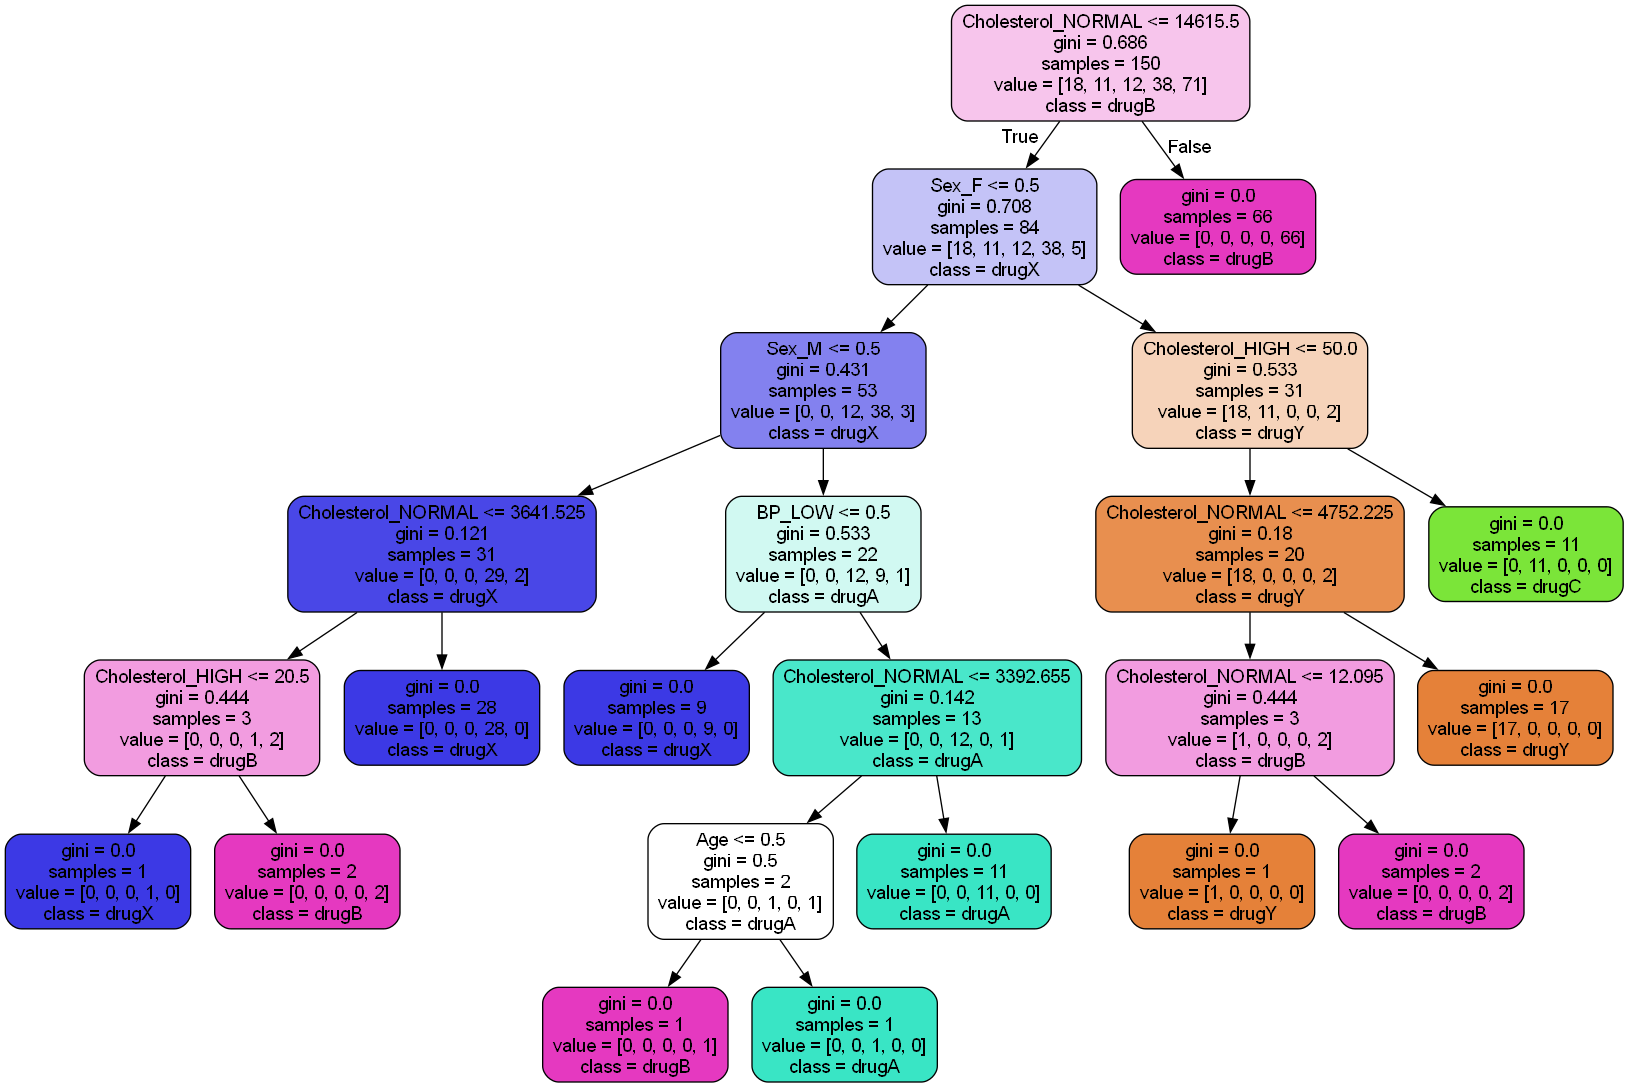

# 4) Ahora indica que el nivel de profundidad máximo permitido es tres. ¿Qué diferencias observas con el árbol anterior?

In [31]:
# Objeto árbol de decisión con profundidad máxima de 3
arbol2 = DecisionTreeClassifier(max_depth=3)

# Se ajusta el modelo con los datos de entrenamiento
arbol2.fit(X_entrenamiento_prepared,y_entrenamiento)

# Se exporta el árbol a archivo .dot
export_graphviz(arbol2, out_file='arbol2.dot', feature_names=predictoras, class_names=clases, rounded=True, filled=True)

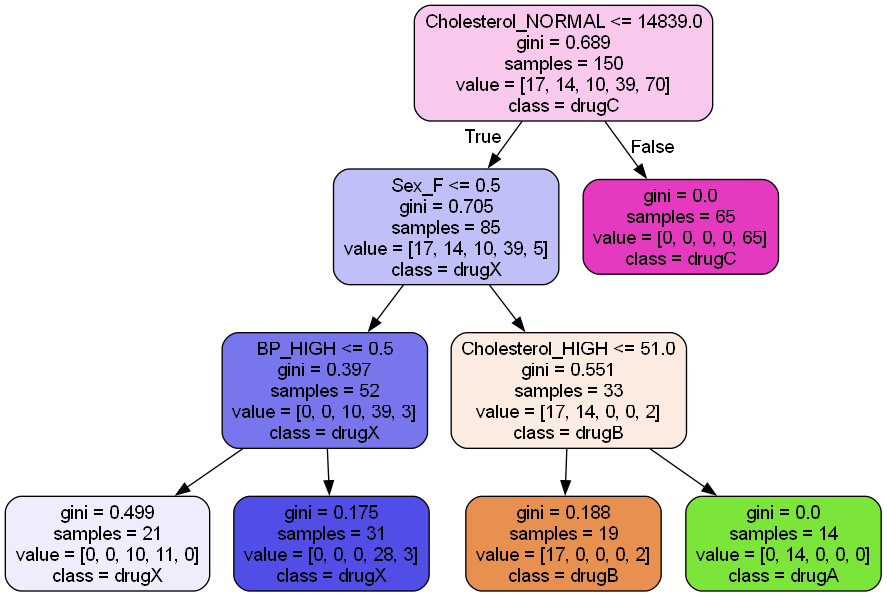

In [34]:
# Al imponer una profundidad máxima de 3 no se obtiene ningún nodo hoja con un número muy pequeño de muestras, como sucedía en el apartado anterior. Cuando no se fija la profundidad
# máxima del árbol, el modelo presenta mayor flexibilidad y se generan nodos hojas con apenas 1 o 2 muestras. Ello podría dar lugar a un problema de sobreajuste.
# Otra diferencia notable entre el arbol1 y el arbol2 es que el parámetro Gini es cero para todos los nodos hoja en el arbol1, mientras que para el arbol2 solo hay un nodo hoja con
# gini=0.0

# 5) Ahora indica que el mínimo número de observaciones que debe contener cada nodo hoja es cinco. ¿Qué diferencias observas con respecto a los árboles anteriores?

In [40]:
# Objeto árbol de decisión con 4 muestras mínimo en cada nodo hoja
arbol3 = DecisionTreeClassifier(min_samples_leaf=5)

# Se ajusta el modelo con los datos de entrenamiento
arbol3.fit(X_entrenamiento_prepared,y_entrenamiento)

# Se exporta el árbol a archivo .dot
export_graphviz(arbol3, out_file='arbol3.dot', feature_names=predictoras, class_names=clases, rounded=True, filled=True)

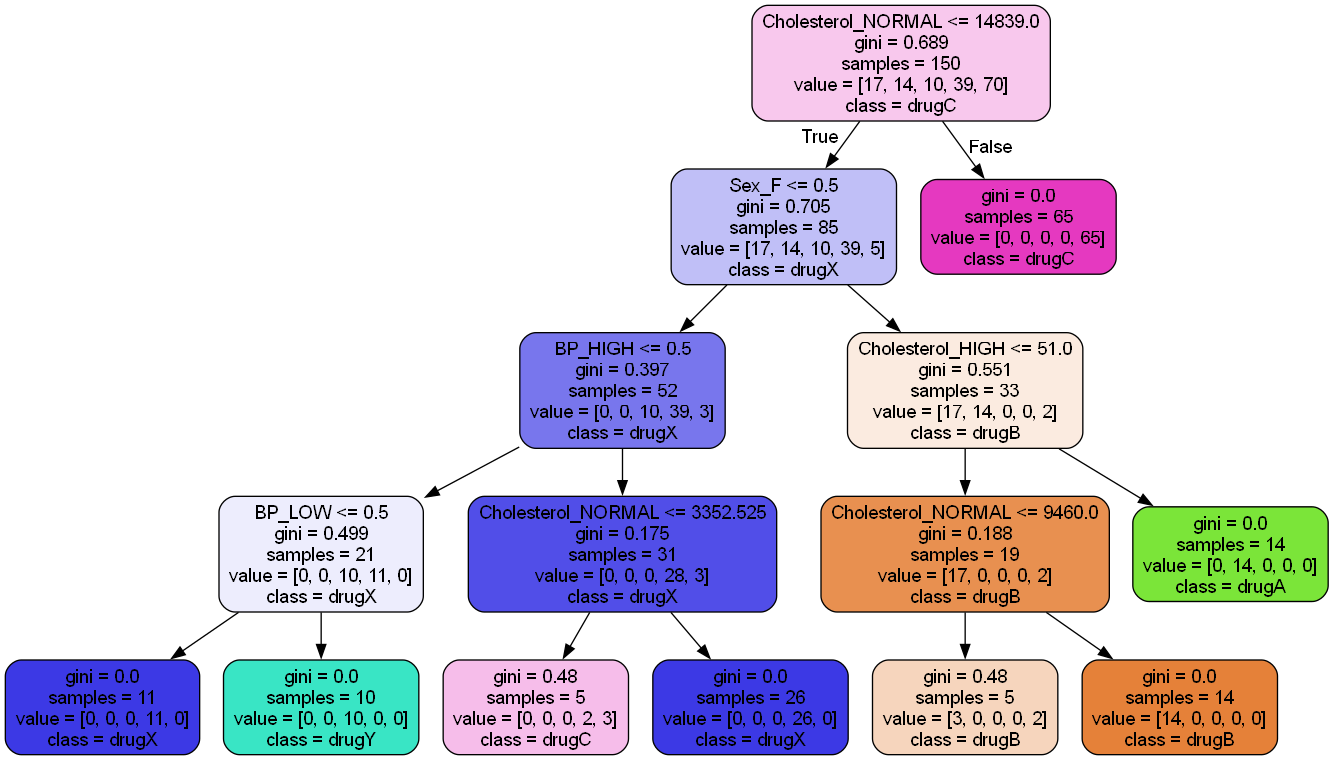

In [116]:
# El arbol3 vuelve a tener la mayoría de nodos hoja con parámetro Gini igual a cero, como el arbol1. Solo hay dos nodos hoja con un número de muestras igual al mínimo impuesto, 5, por
# lo que parece que el arbol3 reduce el sobreajuste.
# Parece que el arbol1 peca de sobreajuste debido a la flexibilidad con la que se ha construido el modelo, mientras que el arbol2 peca de sesgo pues no se reduce considerablemente el
# parámetro Gini de sus nodos hoja. El mejor modelo de los tres parece ser el arbol3, que es un caso intermedio entre el arbol1 y el arbol2.

# 6) Realiza los siguientes modelos de ensamble:
# - Con reemplazamiento (bagging)
# - Sin reemplazamiento (pasting)
# - Random Forest (fijando el número de nodos hoja máximo en cuatro)
# - Gradient Boosting
# 7) Analiza la importancia de las variables de cada uno de los métodos.
# 8) ¿Cuál de todos los métodos aplicados podemos considerar que es mejor? ¿Por qué?

In [75]:
# Para decidir cuál es el mejor modelo, se realiza una medida de la bondad del modelo mediante el cálculo del 'accuracy'. Para ello se emplea la función 'accuracy_score' de la librería
# sklearn.metrics
from sklearn.ensemble import BaggingClassifier # Para realizar ensamble tipo bagging
from sklearn.metrics import accuracy_score # Para medir bondad del ajuste
from sklearn.ensemble import RandomForestClassifier # Para crear Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Para implementar Gradient Boosting

# Ensamnle tipo bagging
# Se crea objeto BaggingClassifier donde los predictores son todos árboles de decisión
# Se escogen 500 predictores para el ensamble y 87 observaciones de las 150 totales para cada predictor. Para garantizar que el tipo de ensamble sea tipo bagging se indica bootstap=True
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=3), n_estimators=500, max_samples=87, bootstrap=True, random_state=3)
# Se ajusta el modelo
bagging.fit(X_entrenamiento_prepared, y_entrenamiento)
# Estimaciones del modelo sobre el conjunto de validación
y_pred_bagging = bagging.predict(X_test_prepared)

# Ensamble tipo pasting
# Se procede igual que en el ensamble tipo bagging, pero cambiando bootstrap=True por bootstrap=False
pasting = BaggingClassifier(DecisionTreeClassifier(random_state=3), n_estimators=500, max_samples=87, bootstrap=False, random_state=3)
# Se ajusta el modelo
pasting.fit(X_entrenamiento_prepared, y_entrenamiento)
# Estimaciones del modelo sobre el conjunto de validación
y_pred_pasting = pasting.predict(X_test_prepared)

# Random Forest
# Se crea objeto Random Forest fijando el número máximo de nodos hoja en 4
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=4, random_state=3, max_samples=87)
# Se ajusta el modelo
rf.fit(X_entrenamiento_prepared, y_entrenamiento)
# Estimaciones del modelo sobre el conjunto de validación
y_pred_rf = rf.predict(X_test_prepared)

# Gradient Boosting
# Se crea objeto de la clase GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, random_state=3)
# Se ajusta el modelo
gb.fit(X_entrenamiento_prepared, y_entrenamiento)
# Estimaciones del modelo sobre el conjunto de validación
y_pred_gb = gb.predict(X_test_prepared)

# Bondad del ajuste
print('Accuracy del ensamble tipo Bagging:', accuracy_score(y_test, y_pred_bagging))
print('Accuracy del ensamble tipo Pasting:', accuracy_score(y_test, y_pred_pasting))
print('Accuracy del Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Accuracy del Gradient Boosting:', accuracy_score(y_test, y_pred_gb))

Accuracy del ensamble tipo Bagging: 0.96
Accuracy del ensamble tipo Pasting: 0.96
Accuracy del Random Forest: 0.84
Accuracy del Gradient Boosting: 0.96


Text(0, 0.5, 'Importancia')

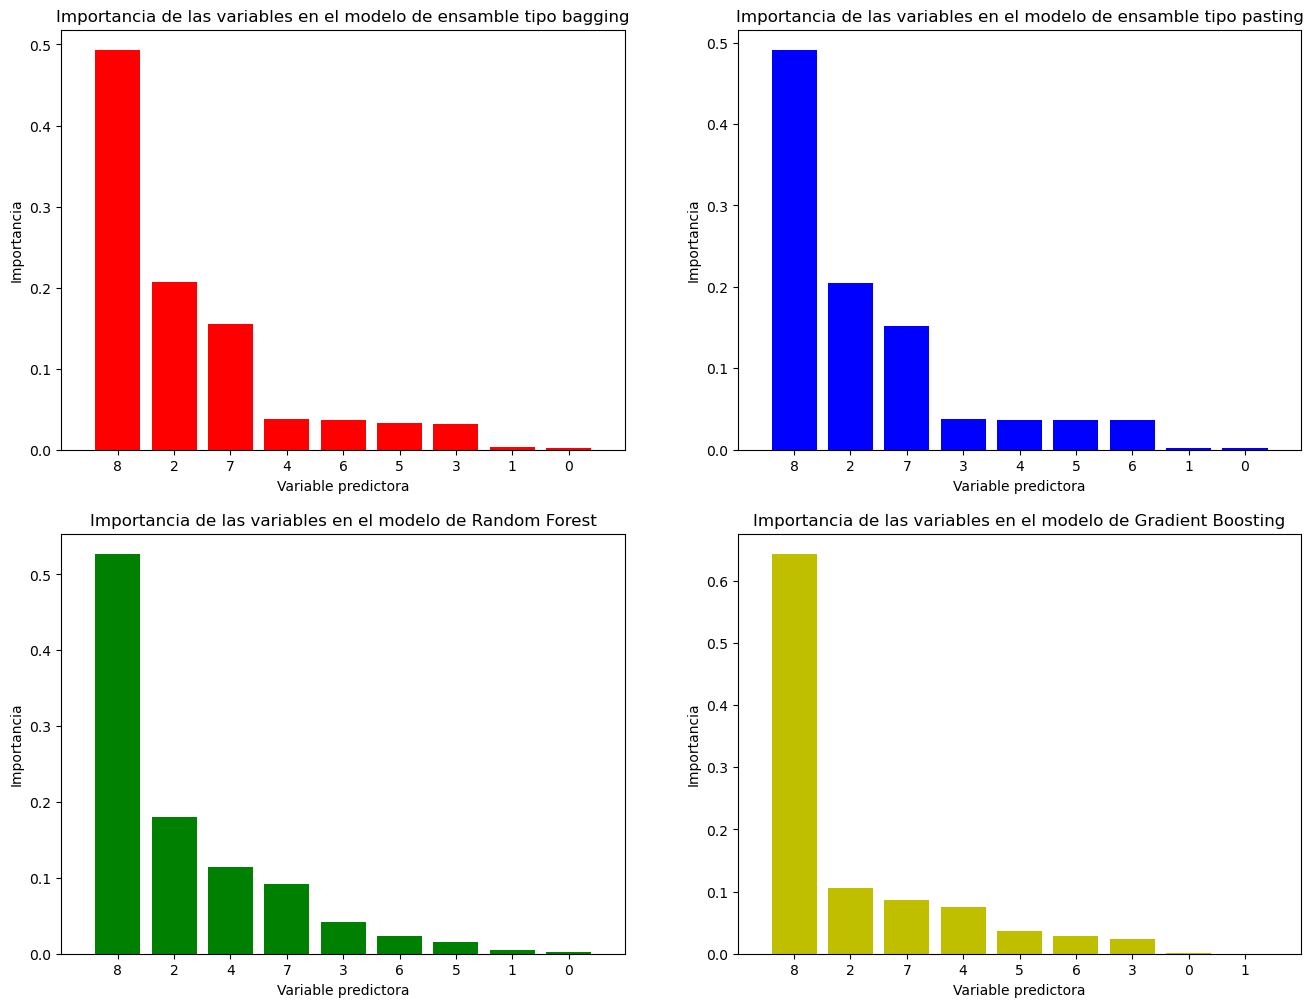

In [122]:
# Analizamos la importancia de las variables para cada método de ensamble. Para ello se emplea el atributo 'feature_importances_'. Luego, las importancias se representan gráficamente
# usando histogramas. Para ello se emplea la librería PyPlot.
import matplotlib.pyplot as plt

# Ensamble tipo bagging
importancias_bagging = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
indices_bagging = np.argsort(importancias_bagging)[::-1] # [::-1] para obtener la lista al revés

# Ensamble tipo pasting
importancias_pasting = np.mean([tree.feature_importances_ for tree in pasting.estimators_], axis=0)
indices_pasting = np.argsort(importancias_pasting)[::-1] # [::-1] para obtener la lista al revés

# Random Forest
importancias_rf = rf.feature_importances_
indices_rf = np.argsort(importancias_rf)[::-1]

# Gradient Boosting
importancias_gb = gb.feature_importances_
indices_gb = np.argsort(importancias_gb)[::-1]

plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.title('Importancia de las variables en el modelo de ensamble tipo bagging')
plt.bar(range(X_entrenamiento_prepared.shape[1]), importancias_bagging[indices_bagging], color='r', align='center')
plt.xticks(range(X_entrenamiento_prepared.shape[1]), indices_bagging)
plt.xlim([-1, X_entrenamiento_prepared.shape[1]])
plt.xlabel('Variable predictora')
plt.ylabel('Importancia')

plt.subplot(222)
plt.title('Importancia de las variables en el modelo de ensamble tipo pasting')
plt.bar(range(X_entrenamiento_prepared.shape[1]), importancias_pasting[indices_pasting], color='b', align='center')
plt.xticks(range(X_entrenamiento_prepared.shape[1]), indices_pasting)
plt.xlim([-1, X_entrenamiento_prepared.shape[1]])
plt.xlabel('Variable predictora')
plt.ylabel('Importancia')

plt.subplot(223)
plt.title('Importancia de las variables en el modelo de Random Forest')
plt.bar(range(X_entrenamiento_prepared.shape[1]), importancias_rf[indices_rf], color='g', align='center')
plt.xticks(range(X_entrenamiento_prepared.shape[1]), indices_rf)
plt.xlim([-1, X_entrenamiento_prepared.shape[1]])
plt.xlabel('Variable predictora')
plt.ylabel('Importancia')

plt.subplot(224)
plt.title('Importancia de las variables en el modelo de Gradient Boosting')
plt.bar(range(X_entrenamiento_prepared.shape[1]), importancias_gb[indices_gb], color='y', align='center')
plt.xticks(range(X_entrenamiento_prepared.shape[1]), indices_gb)
plt.xlim([-1, X_entrenamiento_prepared.shape[1]])
plt.xlabel('Variable predictora')
plt.ylabel('Importancia')

In [ ]:
# En los cuatro modelos, la variable más importante es la 8, que corresponde a Cholesterol_NORMAL, es decir a la variable indicadora que establece si el nivel de colesterol es normal o
# no. También coincide para los cuatro modelos la variable 2, Sex_F, como la segunda variable más importante.